# Practical session 2 - Practise with classic libraries

Students (pair): group F
- [Student 1]([link](https://github.com/Ptiroro)) : Romain BOQUET
- [Student 2]([link](https://github.com/DubusA)) : Antoine DUBUS

```
conda create --name=lab2 --file=requirement.txt
conda activate lab2
# do not forget to deactivate the environment if needed
# you can remove the environment once you are done
conda env remove --name=lab2
```

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [60]:
import numpy as np

rng = np.random.default_rng(seed=42)

In [61]:
print(rng.random())

0.7739560485559633


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [62]:
alpha, beta = 9, 2

shape, scale = alpha, 1/beta

samples = np.random.gamma(shape, scale, 10**5)

In [63]:
samples.shape

(100000,)

In [64]:
with open('samples.npy', 'wb') as f:
    np.save(f, samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

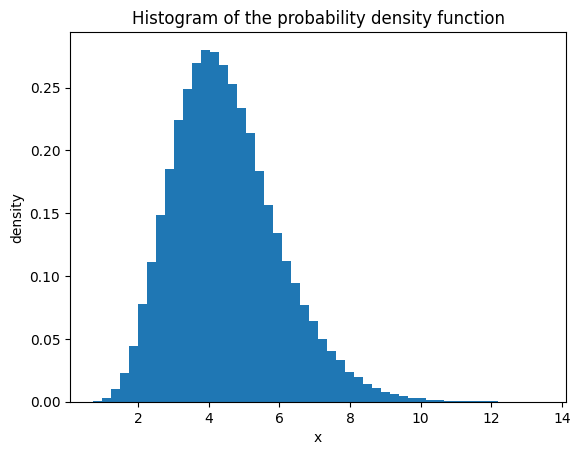

In [65]:
import matplotlib.pyplot as plt
import scipy.special as sps
count, bins, ignored = plt.hist(samples, 50, density=True)
plt.title("Histogram of the probability density function")
plt.xlabel("x")
plt.ylabel("density")
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

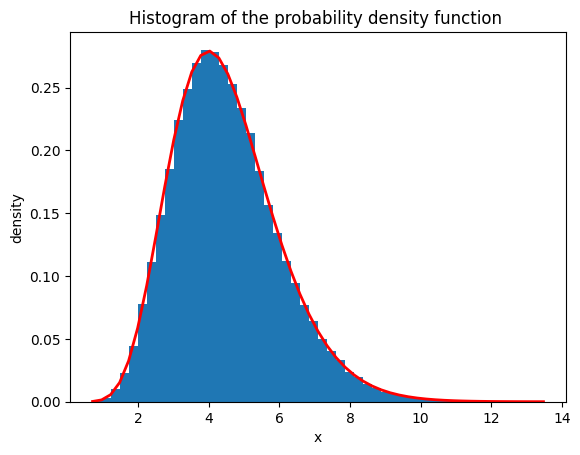

In [66]:
count, bins, ignored = plt.hist(samples, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')
plt.title("Histogram of the probability density function ")
plt.xlabel("x")
plt.ylabel("density")
plt.savefig('probability_density_function.png')
plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [67]:
import pandas as pd

In [68]:
from IPython.display import display

df = pd.read_csv('data/data.csv')
df = df.sort_values(by='X')
display(df)

,X,Y
4,56,37
6,68,34
7,98,25
8,110,36
1,128,28
2,180,24
10,181,20
0,190,24
5,192,22
9,197,24


In [69]:
median = df.median()
mean = df.mean()
variance = df.var()
std = df.std()

print(median)
print(mean)
print(variance)
print(std)

X    180.5
Y     24.0
dtype: float64
X    153.750000
Y     25.916667
dtype: float64
X    3486.022727
Y      42.446970
dtype: float64
X    59.042550
Y     6.515134
dtype: float64


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [70]:
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()

a, b = np.polyfit(X, Y, 1)

print(f'The equation of the regression is Y = {a:.4f}X + {b:.4f}')

The equation of the regression is Y = -0.0982X + 41.0095


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

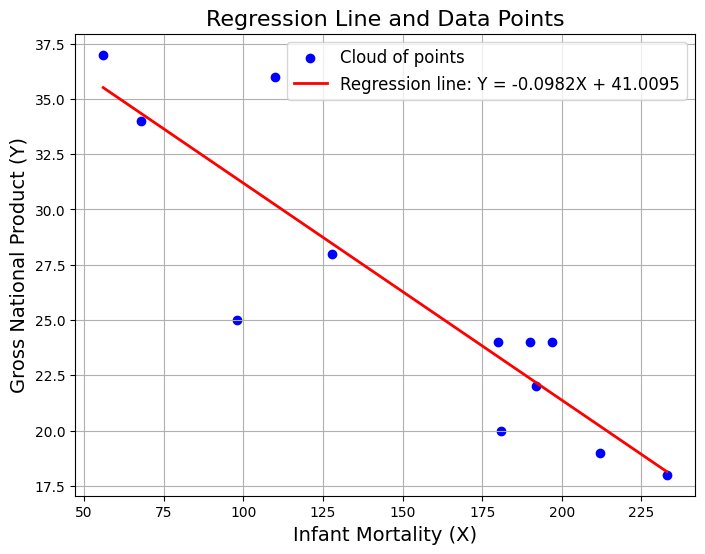

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Cloud of points')
plt.plot(X, a*X + b, color='red', label=f'Regression line: Y = {a:.4f}X + {b:.4f}', linewidth=2)

# Step 6: Add title and labels
plt.title('Regression Line and Data Points', fontsize=16)
plt.xlabel('Infant Mortality (X)', fontsize=14)
plt.ylabel('Gross National Product (Y)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Step 7: Save the figure as a .png file
plt.savefig('regression_line.png')

# Step 8: Display the plot
plt.show()


---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [150]:
def gradient2D(X):
    if X.ndim != 2:
        raise AssertionError("Input must be a 2D matrix.")

    grad_h = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]

    grad_v = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]

    return(grad_h, grad_v)


X1 = np.array([[1, 1],
                [1, 1],
                [1, 1]])
gradient2D(X1)

(array([[0., 0.],
        [0., 0.],
        [0., 0.]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]]))

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [154]:
def test_matrix():
    X1 = np.array([[1, 1],
                [1, 1]])
    grad_h, grad_v = gradient2D(X1)

    assert(grad_h == np.array([[0., 0.], [0., 0.]]), 'error on grad_h')
    assert(grad_v == np.array([[0., 0.], [0., 0.]]), 'error on grad_v')

    X2 = np.array([[1, 1],
                [1, 1],
                [1, 1]])
    grad_h, grad_v = gradient2D(X2)

    assert(grad_h == np.array([[0., 0.], [0., 0.], [0., 0.]]), 'error on grad_h')
    assert(grad_v == np.array([[0., 0.], [0., 0.], [0., 0.]]), 'error on grad_v')

    print('All tests passed')


def test_dimension():
    X2 = np.array([[1, 2],
                 [3, 4],
                 [5, 6]])

    grad_h, grad_v = gradient2D(X2)

    assert(grad_h.shape == (3, 2), 'dimensions problems')
    assert(grad_v.shape == (3, 2), 'dimensions problems')
    print('All tests passed')


test_matrix()
test_dimension()

All tests passed
All tests passed


<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:28: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:7: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:15: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:28: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\boque\AppData\Local\Temp\ipykernel_16176\3533401604.py:6: SyntaxWarning: assertion 

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [96]:
import numpy as np

def gradient2D(X):
    """
    Compute the 2D discrete gradient operator D for an input matrix X.

    This function computes the horizontal and vertical differences of the
    input matrix X. The differences are computed between adjacent columns
    and rows, with the last column and row padded with zeros to maintain
    the same shape as the input matrix.

    Parameters
    ----------
    X : numpy.ndarray
        A 2D matrix of shape (M, N) where M is the number of rows and
        N is the number of columns. X must be a 2D array; an error will
        be raised if more than 2 dimensions are provided.

    Returns
    -------
    tuple of numpy.ndarray
        A tuple containing two 2D arrays:
        - grad_h : Horizontal differences (differences along columns).
        - grad_v : Vertical differences (differences along rows).
        Both arrays have the same shape as the input matrix X.

    Raises
    ------
    AssertionError
        If the input X is not a 2D array.

    Example
    -------
    >>> X = np.array([[1, 2, 3],
    ...               [4, 5, 6],
    ...               [7, 8, 9]])
    >>> grad_h, grad_v = gradient2D(X)
    >>> print(grad_h)
    [[1. 1. 0.]
     [1. 1. 0.]
     [1. 1. 0.]]

    >>> print(grad_v)
    [[3. 3. 3.]
     [3. 3. 3.]
     [0. 0. 0.]]
    """

    # Check that the input is a 2D array
    if X.ndim != 2:
        raise AssertionError("Input must be a 2D matrix.")

    # Compute the horizontal gradient (differences along columns)
    grad_h = np.c_[np.diff(X, axis=1), np.zeros((X.shape[0], 1))]

    # Compute the vertical gradient (differences along rows)
    grad_v = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]

    return grad_h, grad_v


4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [117]:
def tv(X):
    """
    Compute the total variation (TV) of an input matrix X.

    The total variation is defined as the sum of the L2 norms of the
    horizontal and vertical gradients of the matrix. The function
    computes the discrete gradient and then calculates the TV value.

    Parameters
    ----------
    X : numpy.ndarray
        A 2D matrix of shape (M, N) where M is the number of rows and
        N is the number of columns. X must be a 2D array; an error will
        be raised if more than 2 dimensions are provided.

    Returns
    -------
    float
        The total variation of the matrix X, which is a non-negative
        scalar value.

    Raises
    ------
    AssertionError
        If the input X is not a 2D array.

    Example
    -------
    >>> X = np.array([[1, 2, 3],
    ...               [4, 5, 6],
    ...               [7, 8, 9]])
    >>> print(tv(X))
    12.0
    """

    grad_h, grad_v = gradient2D(X)

    # Calculate the total variation as the sum of the L2 norms of the gradients
    tv_value = np.sum(np.sqrt(grad_h**2 + grad_v**2))

    return tv_value


X1 = np.array([[1, 1],
                   [1, 1],
                   [1, 1]])

tv(X1)

0.0

In [119]:
# Unit Test
def test_tv():
    """
    Unit test for the tv function.
    """
    # Test case 1: Simple input
    X1 = np.array([[1, 2],
                   [3, 4]])
    assert np.isclose(tv(X1), 5.23, 1e-2), "Test case 1 failed"

    # Test case 2: Constant matrix
    X2 = np.array([[1, 1],
                   [1, 1]])
    assert np.isclose(tv(X2), 0.0, 1e-2), "Test case 2 failed"

    # Test case 3: Rectangular matrix
    X3 = np.array([[1, 1],
                   [1, 1],
                   [1, 1]])
    assert np.isclose(tv(X3), 0., 1e-2), "Test case 3 failed"

    print("All test cases passed")

# Run the unit test
test_tv()

All test cases passed


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [146]:
def gradient2D_adjoint(Y):
    """
    Compute the adjoint of the 2D discrete gradient operator D* for an input tuple Y.

    This function computes the adjoint operation D* on the input tuple Y, which contains
    the horizontal and vertical components of the gradient. It reconstructs the original
    matrix from its gradients.

    Parameters
    ----------
    Y : tuple of numpy.ndarray
        A tuple containing two 2D matrices:
        - Y_h : Horizontal gradient component (shape: (M, N))
        - Y_v : Vertical gradient component (shape: (M, N))

    Returns
    -------
    numpy.ndarray
        A 2D matrix of shape (M, N) that represents the result of applying the adjoint operator
        D* to the input tuple Y.

    Example
    -------
    >>> Y_h = np.array([[1, 2], [3, 4]])
    >>> Y_v = np.array([[5, 6], [7, 8]])
    >>> X_reconstructed = gradient2D_adjoint((Y_h, Y_v))
    """

    Y_h, Y_v = Y

    # Horizontal adjoint
    M, N = Y_h.shape
    adj_h = np.zeros((M, N))

    adj_h[:, :-1] -= Y_h[:, :-1]  # Apply negative of Y_h to the left side

    adj_h[:, 1:] += Y_h[:, :-1]   # Apply Y_h to the right side


    # Vertical adjoint
    adj_v = np.zeros((M, N))
    adj_v[:-1, :] -= Y_v[:-1, :]  # Apply negative of Y_v to the top side
    adj_v[1:, :] += Y_v[:-1, :]   # Apply Y_v to the bottom side


    adj_result = adj_h + adj_v

    return adj_result


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^T \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

> `np.conj` is useful.

In [147]:
def test_gradient2D_adjoint():
    """
    Unit test for the gradient2D_adjoint function.
    """

    np.random.seed(42)

    M, N = 4, 5
    X = np.random.rand(M, N)

    # Compute the gradient D(X)
    grad_h, grad_v = gradient2D(X)
    Y = (grad_h, grad_v)

    # Compute the adjoint D*(Y)
    adj_result = gradient2D_adjoint(Y)

    # Verify the size of the output from gradient2D_adjoint matches X
    assert adj_result.shape == X.shape, "Output size from gradient2D_adjoint does not match input X."

    # Compute the inner products
    inner_product_DX_Y = np.sum(np.conj(grad_h) * Y[0]) + np.sum(np.conj(grad_v) * Y[1])
    inner_product_X_adjY = np.sum(np.conj(X) * adj_result)

    # Check if the inner products are close
    assert np.isclose(inner_product_DX_Y, inner_product_X_adjY), "The adjoint property does not hold."

    print("All tests passed!")

# Run the unit test
test_gradient2D_adjoint()


All tests passed!


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
\begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [78]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
